In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

### Loading The Dataset

In [20]:
df = pd.read_csv("C:/Users/craje/Downloads/heart.csv.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,60,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,35,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,55,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,56,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       289 non-null    int64  
 1   sex       289 non-null    int64  
 2   cp        289 non-null    int64  
 3   trtbps    289 non-null    int64  
 4   chol      289 non-null    int64  
 5   fbs       289 non-null    int64  
 6   restecg   289 non-null    int64  
 7   thalachh  289 non-null    int64  
 8   exng      289 non-null    int64  
 9   oldpeak   289 non-null    float64
 10  slp       289 non-null    int64  
 11  caa       289 non-null    int64  
 12  thall     289 non-null    int64  
 13  output    289 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 31.7 KB


In [25]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [26]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000
mean,54.010381,0.678201,1.020761,131.377163,247.961938,0.145329,0.515571,150.231834,0.318339,1.007612,1.418685,0.712803,2.314879,0.570934
std,9.132316,0.467977,1.027192,17.518432,51.596208,0.353043,0.514309,22.899650,0.466640,1.133491,0.613333,1.022596,0.596128,0.495801
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,136.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,243.000000,0.000000,1.000000,154.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,276.000000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### EDA

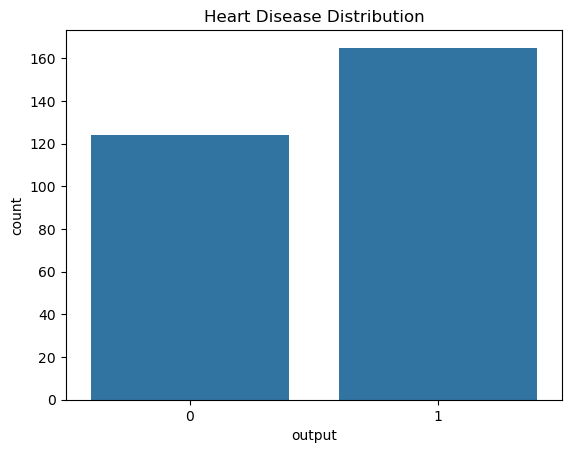

In [77]:
sns.countplot(x="output", data=df)
plt.title("Heart Disease Distribution")
plt.savefig("../images/heart_distribution.png")
plt.show()

### Correlation Heatmap

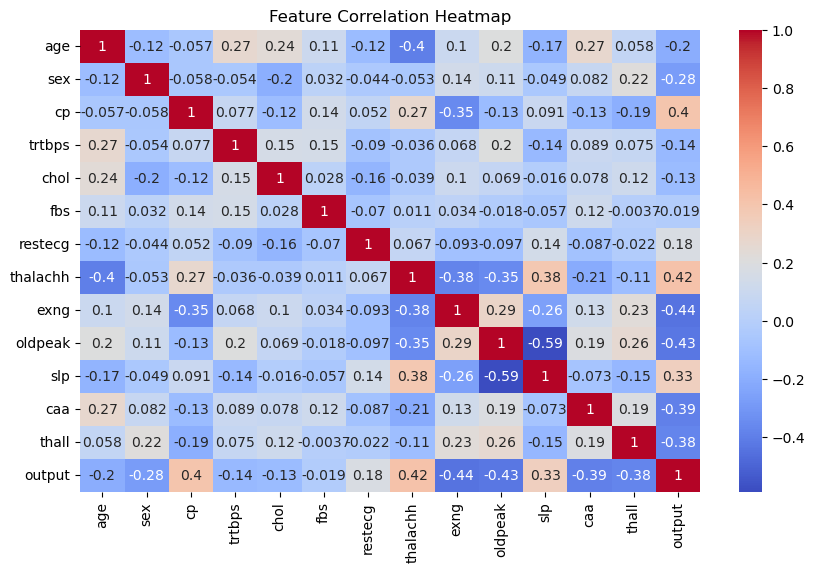

In [78]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.savefig("../images/heart_heatmap.png")
plt.show()

### training,testing & splitting the dataset 

In [38]:
x = df.iloc[:,:-1]
y = df.output

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [42]:
df.shape

(289, 14)

In [40]:
x_train

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
93,54,0,1,132,288,1,0,159,1,0.0,2,1,2
66,51,1,2,100,222,0,1,143,1,1.2,1,0,2
63,41,1,1,135,203,0,1,132,0,0.0,1,0,1
79,58,1,2,105,240,0,0,154,1,0.6,1,0,3
25,71,0,1,160,302,0,1,162,0,0.4,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [43]:
x_test

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
45,52,1,1,120,325,0,1,172,0,0.2,2,0,2
157,35,1,1,122,192,0,1,174,0,0.0,2,0,2
274,45,1,0,110,275,0,0,118,1,1.0,1,1,2
42,45,1,0,104,208,0,0,148,1,3.0,1,0,2
181,65,0,0,150,225,0,0,114,0,1.0,1,3,3
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2
46,44,1,2,140,235,0,0,180,0,0.0,2,0,2
172,58,1,1,120,284,0,0,160,0,1.8,1,0,2
77,59,1,1,140,221,0,1,164,1,0.0,2,0,2
195,59,1,0,170,326,0,0,140,1,3.4,0,0,3


In [44]:
y_train

93     1
66     1
63     1
79     1
25     1
      ..
188    0
71     1
106    1
270    0
102    1
Name: output, Length: 231, dtype: int64

In [45]:
y_test

45     1
157    1
274    0
42     1
181    0
9      1
46     1
172    0
77     1
195    0
221    0
33     1
116    1
215    0
56     1
223    0
5      1
225    0
238    0
75     1
268    0
84     1
113    1
271    0
73     1
287    0
140    1
147    1
111    1
60     1
101    1
185    0
154    1
237    0
183    0
168    0
232    0
143    1
202    0
117    1
165    0
256    0
155    1
132    1
30     1
22     1
24     1
158    1
144    1
167    0
240    0
255    0
97     1
208    0
173    0
179    0
278    0
6      1
Name: output, dtype: int64

### Train Logistic Regression model

In [46]:
logmodel = LogisticRegression()
logmodel

LogisticRegression()

In [47]:
logmodel.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Predictions

In [48]:
y_pred = logmodel.predict(x_test)
y_pred

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1])

### Evaluations

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.87      0.87      0.87        31

    accuracy                           0.86        58
   macro avg       0.86      0.86      0.86        58
weighted avg       0.86      0.86      0.86        58



###  Confusion Matrix

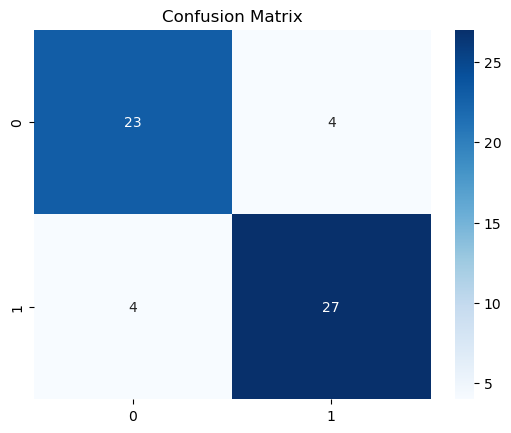

In [79]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.savefig("../images/confusion_matrix.png")
plt.show()

### ROC Curve

In [64]:
y_prob = logmodel.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

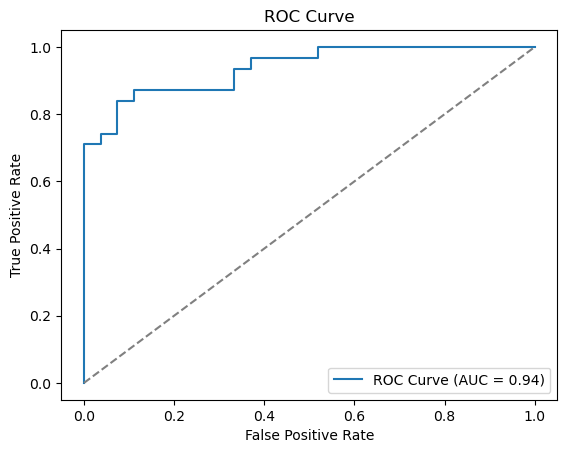

In [80]:
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1],"--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.savefig("../images/roc_curve.png")
plt.show()